In [5]:
import pandas as pd 
import json
import warnings
warnings.filterwarnings('ignore')

## **load data**

In [6]:
db = json.load(open('./data/US_foods.json','r'))
print(len(db))
print(db[0].keys())
print(db[0]['nutrients'][0])

6636
dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])
{'value': 25.18, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}


In [7]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients.head(10)

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy
7,0.00,g,"Fiber, total dietary",Composition
8,673.00,mg,"Calcium, Ca",Elements
9,0.64,mg,"Iron, Fe",Elements


In [8]:
info = pd.DataFrame(db, columns=['description', 'group', 'id', 'manufacturer'])
print(info.info())
info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB
None


,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


## **distribution of food groups**

In [9]:
pd.value_counts(info.group).head(10)

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [10]:
nutrients = []
for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
nutrients = pd.concat(nutrients, ignore_index=True)
nutrients.head(10)

,value,units,description,group,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008
5,39.28,g,Water,Composition,1008
6,1573.00,kJ,Energy,Energy,1008
7,0.00,g,"Fiber, total dietary",Composition,1008
8,673.00,mg,"Calcium, Ca",Elements,1008
9,0.64,mg,"Iron, Fe",Elements,1008


## **drop duplicatins**

In [11]:
print(f'dublications: {nutrients.duplicated().sum()}')
nutrients = nutrients.drop_duplicates()

dublications: 14179


In [12]:
col_mapping = {'description' : 'food', 'group' : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
col_mapping = {'description' : 'nutrient','group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)

## **merge data**

In [13]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
print(ndata.info())
ndata.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB
None


,value,units,nutrient,nutgroup,id,food,fgroup,manufacturer
0,25.18,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.20,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.06,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.28,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.00,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,
5,39.28,g,Water,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
6,1573.00,kJ,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,
7,0.00,g,"Fiber, total dietary",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
8,673.00,mg,"Calcium, Ca",Elements,1008,"Cheese, caraway",Dairy and Egg Products,
9,0.64,mg,"Iron, Fe",Elements,1008,"Cheese, caraway",Dairy and Egg Products,


## **Median zinc values by nutrient group**

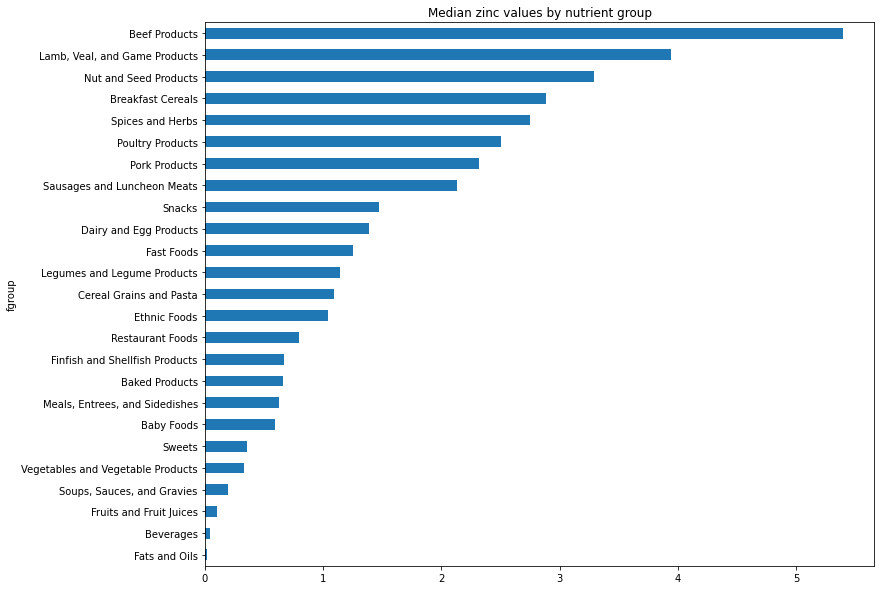

In [14]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh',figsize=(12,10),title='Median zinc values by nutrient group')

## **which food is most dense in each nutrient**

In [15]:
max_foods = ndata.groupby(['nutgroup', 'nutrient']).apply(lambda x: x.loc[x.value.idxmax()])[['value','food']]
max_foods.head(10)

value  \
nutgroup    nutrient                 
Amino Acids Alanine          8.009   
            Arginine         7.436   
            Aspartic acid   10.203   
            Cystine          1.307   
            Glutamic acid   17.452   
            Glycine         19.049   
            Histidine        2.999   
            Hydroxyproline   0.803   
            Isoleucine       4.300   
            Leucine          7.200   

                                                                         food  
nutgroup    nutrient                                                           
Amino Acids Alanine                         Gelatins, dry powder, unsweetened  
            Arginine                             Seeds, sesame flour, low-fat  
            Aspartic acid                                 Soy protein isolate  
            Cystine              Seeds, cottonseed flour, low fat (glandless)  
            Glutamic acid                                 Soy protein isolate  
            Glycine                         Gelatins, dry powder, unsweetened  
            Histidine              Whale, beluga, meat, dried (Alaska Native)  
            Hydroxyproline  KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...  
            Isoleucine      Soy protein isolate, PROTEIN TECHNOLOGIES INTE...  
            Leucine         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...

## **Amino Acids nutrient group**

In [16]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 